<a href="https://colab.research.google.com/github/Saraileiva/Tarea1Bootcamp/blob/main/Tarea1Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Subir archivo desde tu PC
from google.colab import files
uploaded = files.upload()

# Cargar CSV en un DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving global_freelancers_raw.csv to global_freelancers_raw.csv


,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


In [ ]:
# Descripción del Dataset
print("Descripción del Dataset")

# Tamaño del dataset
print("Filas y columnas:", df.shape)

# Tipos de datos
print("Tipos de datos:\n", df.dtypes)

# Primeras filas
print("Primeras filas:\n", df.head())

# Últimas filas
print("Ultimas filas:\n", df.tail())

Descripción del Dataset
Filas y columnas: (1000, 12)
Tipos de datos:
 freelancer_ID           object
name                    object
gender                  object
age                    float64
country                 object
language                object
primary_skill           object
years_of_experience    float64
hourly_rate (USD)       object
rating                 float64
is_active               object
client_satisfaction     object
dtype: object
Primeras filas:
   freelancer_ID             name  gender   age    country language  \
0      FL250001  Ms. Nicole Kidd       f  52.0      Italy  Italian   
1      FL250002   Vanessa Garcia  FEMALE  52.0  Australia  English   
2      FL250003      Juan Nelson    male  53.0    Germany   German   
3      FL250004   Amanda Spencer       F  38.0  Australia  English   
4      FL250005  Lynn Curtis DDS  female  53.0    Germany   German   

            primary_skill  years_of_experience hourly_rate (USD)  rating  \
0  Blockchain Development     

Análisis de Datos Faltantes
freelancer_ID            0
name                     0
gender                   0
age                     30
country                  0
language                 0
primary_skill            0
years_of_experience     51
hourly_rate (USD)       94
rating                 101
is_active               89
client_satisfaction    176
dtype: int64


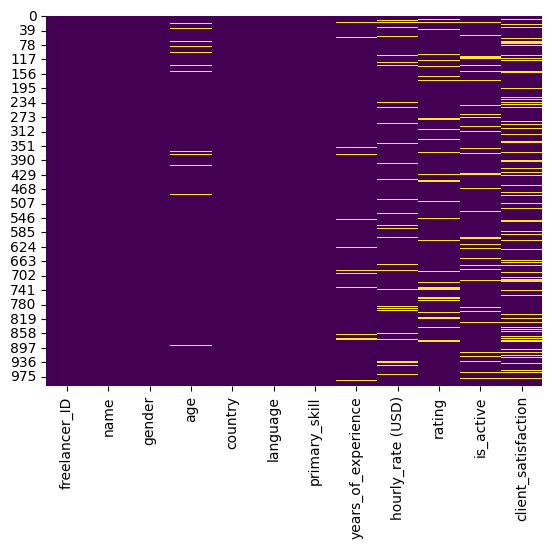

In [14]:
# Análisis de Datos Faltantes
print("Análisis de Datos Faltantes")

# Contar valores nulos por columna
print(df.isnull().sum())

# Visualización de valores nulos
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [13]:
import numpy as np

# Copiar para no dañar el original
df_clean = df.copy()

# --- Limpiar 'gender'
df_clean['gender'] = df_clean['gender'].str.strip().str.lower()
gender_map = {
    'female': 'female', 'f': 'female', 'fem': 'female', 'woman': 'female',
    'male': 'male', 'm': 'male', 'man': 'male'
}
df_clean['gender'] = df_clean['gender'].replace(gender_map)

# --- Rellenar edad y años de experiencia con la mediana
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean['years_of_experience'] = df_clean['years_of_experience'].fillna(df_clean['years_of_experience'].median())

# --- Limpiar columna de tarifa por hora
def parse_hourly_rate(rate):
    if pd.isna(rate):
        return np.nan
    return float(''.join(filter(str.isdigit, str(rate))))

df_clean['hourly_rate'] = df_clean['hourly_rate (USD)'].apply(parse_hourly_rate)
df_clean.drop(columns=['hourly_rate (USD)'], inplace=True)
df_clean['hourly_rate'] = df_clean['hourly_rate'].fillna(df_clean['hourly_rate'].median())

# --- Rellenar rating con la mediana
df_clean['rating'] = df_clean['rating'].fillna(df_clean['rating'].median())

# --- Limpiar y convertir 'client_satisfaction'
df_clean['client_satisfaction'] = df_clean['client_satisfaction'].str.replace('%', '')
df_clean['client_satisfaction'] = pd.to_numeric(df_clean['client_satisfaction'], errors='coerce')
df_clean['client_satisfaction'] = df_clean['client_satisfaction'].fillna(df_clean['client_satisfaction'].median())

# --- Normalizar is_active
df_clean['is_active'] = df_clean['is_active'].astype(str).str.strip().str.lower()
df_clean['is_active'] = df_clean['is_active'].replace({'yes': '1', 'no': '0', 'n': '0', 'y': '1'})
df_clean['is_active'] = pd.to_numeric(df_clean['is_active'], errors='coerce').fillna(0).astype(int)

# Verificar
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  1000 non-null   float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  1000 non-null   float64
 8   rating               1000 non-null   float64
 9   is_active            1000 non-null   int64  
 10  client_satisfaction  1000 non-null   float64
 11  hourly_rate          1000 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 93.9+ KB


,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,rating,is_active,client_satisfaction,hourly_rate
0,FL250001,Ms. Nicole Kidd,female,52.0,Italy,Italian,Blockchain Development,11.0,2.6,0,79.0,100.0
1,FL250002,Vanessa Garcia,female,52.0,Australia,English,Mobile Apps,34.0,3.3,1,84.0,100.0
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,0.0,0,71.0,50.0
3,FL250004,Amanda Spencer,female,38.0,Australia,English,Web Development,4.0,1.5,0,90.0,40.0
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,4.8,0,83.0,30.0


Estadisticas
                age  years_of_experience       rating    is_active  \
count  1000.000000          1000.000000  1000.000000  1000.000000   
mean     40.524000            11.221000     2.521400     0.369000   
std      11.762218             9.444329     1.466572     0.482775   
min      20.000000             0.000000     0.000000     0.000000   
25%      31.000000             3.000000     1.500000     0.000000   
50%      41.000000             9.000000     2.600000     0.000000   
75%      51.000000            17.000000     3.700000     1.000000   
max      60.000000            41.000000     5.000000     1.000000   

       client_satisfaction  hourly_rate  
count          1000.000000  1000.000000  
mean             79.222000    51.290000  
std              10.434059    26.259769  
min              60.000000    20.000000  
25%              71.000000    30.000000  
50%              79.000000    40.000000  
75%              87.000000    75.000000  
max             100.000000  

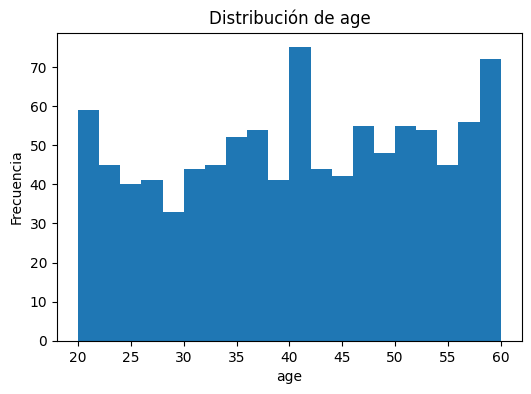

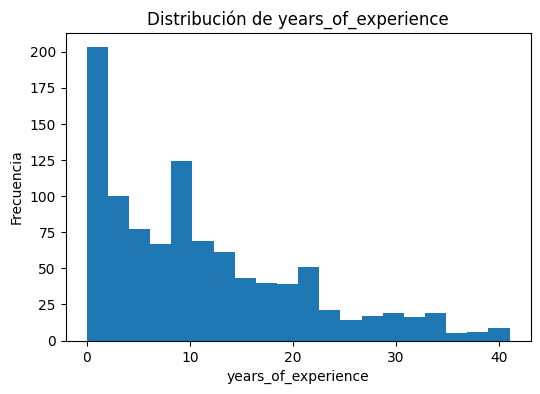

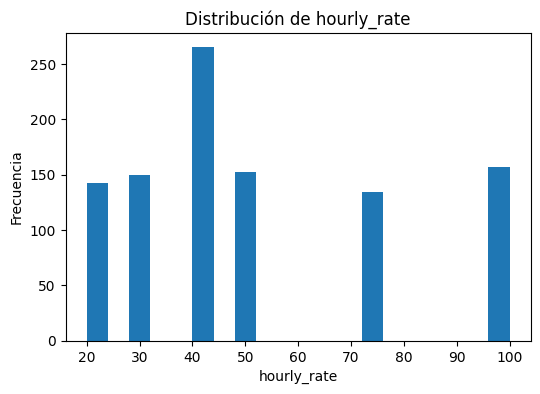

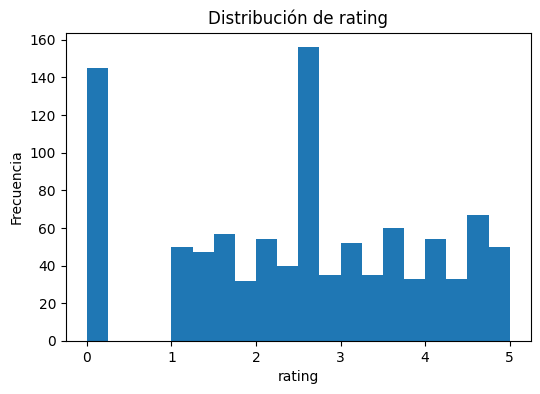

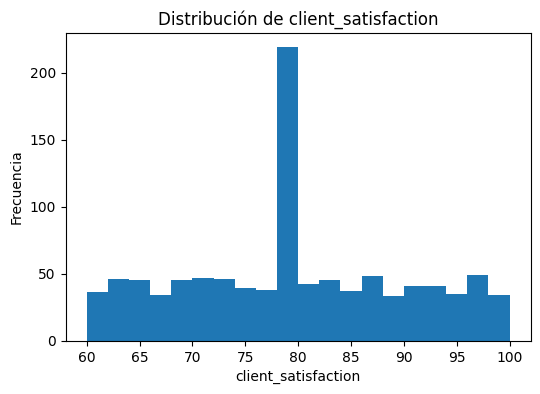

In [15]:
import matplotlib.pyplot as plt

# 1. Estadísticas descriptivas
print("Estadisticas\n",df_clean.describe())

# 2. Histograma de todas las variables numéricas
numerical_cols = ['age', 'years_of_experience', 'hourly_rate', 'rating', 'client_satisfaction']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df_clean[col].hist(bins=20)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(False)
    plt.show()


Frecuencias de: gender
gender
male      510
female    490
Name: count, dtype: int64


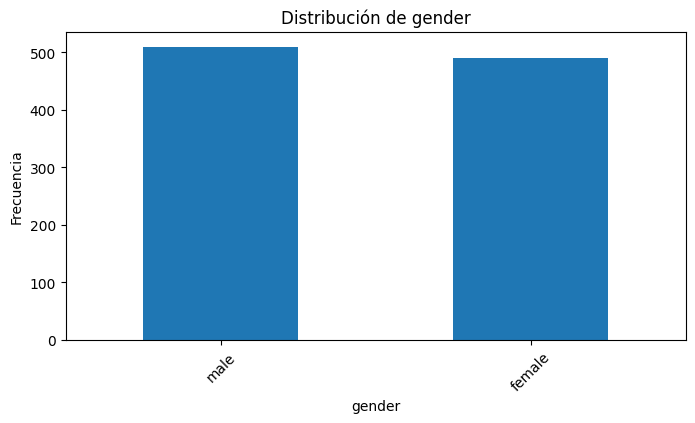


Frecuencias de: country
country
South Korea       68
Canada            65
Germany           52
Netherlands       51
Australia         51
Mexico            50
United Kingdom    50
United States     49
China             49
Russia            47
Argentina         47
Indonesia         46
Spain             45
India             45
Turkey            45
South Africa      44
France            44
Italy             42
Egypt             42
Japan             37
Brazil            31
Name: count, dtype: int64


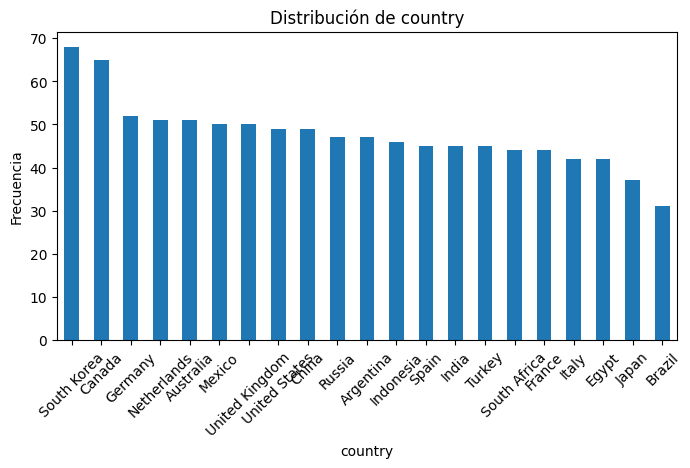


Frecuencias de: language
language
English       215
Spanish       142
Korean         68
German         52
Dutch          51
Mandarin       49
Russian        47
Indonesian     46
Turkish        45
Hindi          45
Afrikaans      44
French         44
Arabic         42
Italian        42
Japanese       37
Portuguese     31
Name: count, dtype: int64


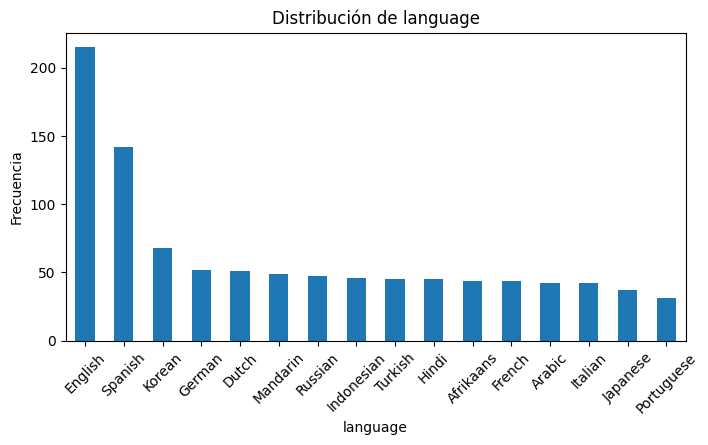


Frecuencias de: primary_skill
primary_skill
DevOps                    112
UI/UX Design              109
Blockchain Development    105
Web Development           104
Mobile Apps               102
AI                        100
Data Analysis              96
Graphic Design             93
Machine Learning           93
Cybersecurity              86
Name: count, dtype: int64


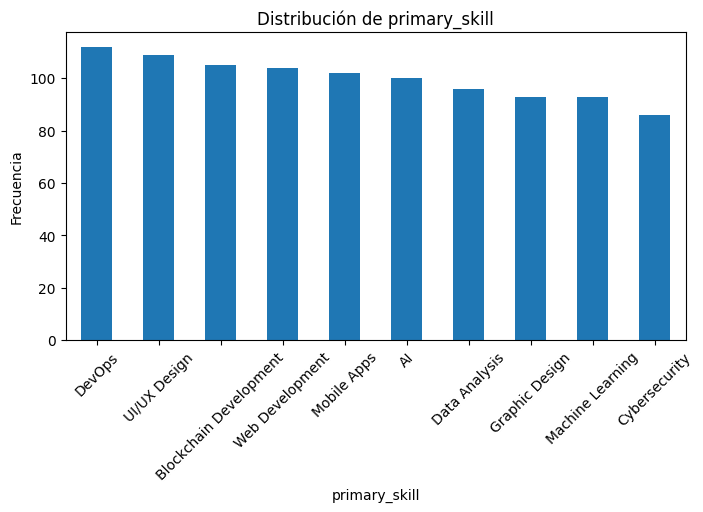


Frecuencias de: is_active
is_active
0    631
1    369
Name: count, dtype: int64


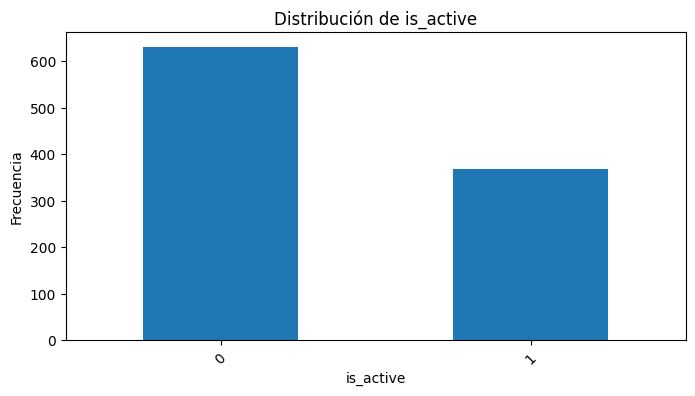

In [18]:
# Seleccionar columnas categóricas relevantes
categorical_cols = ['gender', 'country', 'language', 'primary_skill', 'is_active']

for col in categorical_cols:
    print(f"\nFrecuencias de: {col}")
    print(df_clean[col].value_counts())

    # Gráfico de barras
    plt.figure(figsize=(8, 4))
    df_clean[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

Análisis de Relaciones Entre Variables
                          age  years_of_experience    rating  is_active  \
age                  1.000000             0.603939 -0.001312  -0.006409   
years_of_experience  0.603939             1.000000  0.025582  -0.000560   
rating              -0.001312             0.025582  1.000000   0.028705   
is_active           -0.006409            -0.000560  0.028705   1.000000   
client_satisfaction -0.025051            -0.056317 -0.000108  -0.015881   
hourly_rate          0.068978             0.078625  0.022000   0.047295   

                     client_satisfaction  hourly_rate  
age                            -0.025051     0.068978  
years_of_experience            -0.056317     0.078625  
rating                         -0.000108     0.022000  
is_active                      -0.015881     0.047295  
client_satisfaction             1.000000    -0.048503  
hourly_rate                    -0.048503     1.000000  


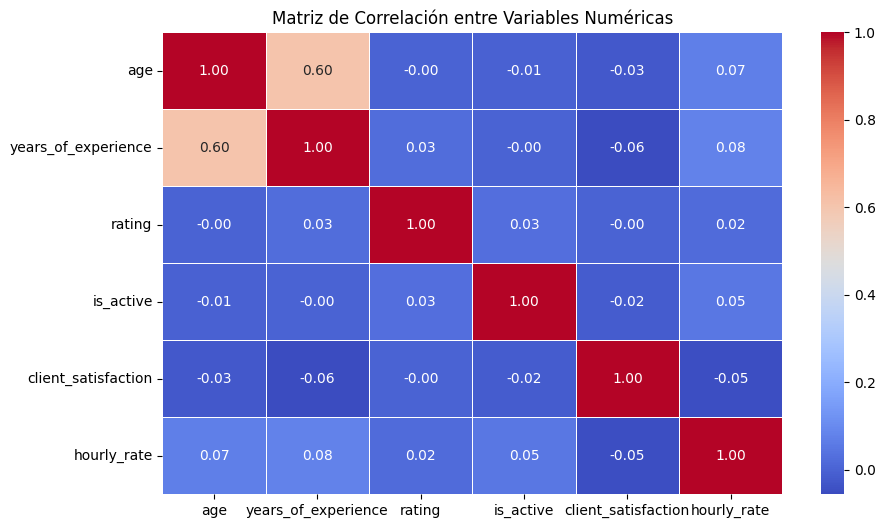

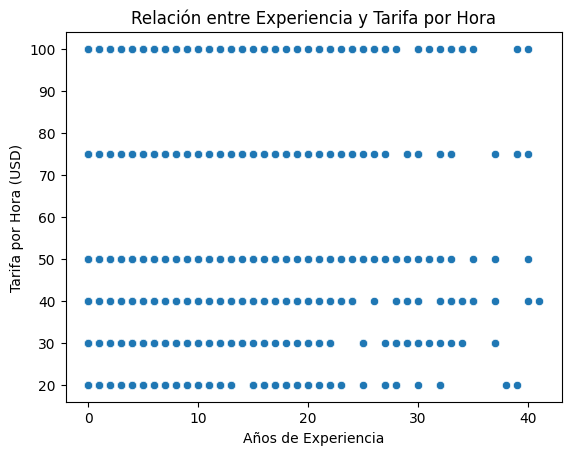

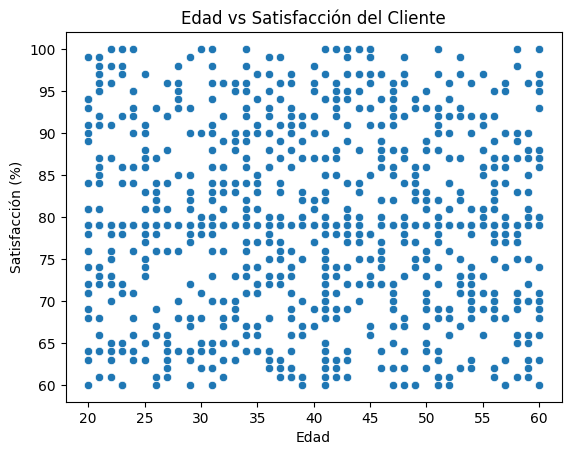

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis de Relaciones Entre Variables
print("Análisis de Relaciones Entre Variables")

# Matriz de correlación solo para variables numéricas
correlation_matrix = df_clean.corr(numeric_only=True)
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Scatterplot: años de experiencia vs tarifa por hora
sns.scatterplot(data=df_clean, x='years_of_experience', y='hourly_rate')
plt.title('Relación entre Experiencia y Tarifa por Hora')
plt.xlabel('Años de Experiencia')
plt.ylabel('Tarifa por Hora (USD)')
plt.show()

# Otro ejemplo: edad vs satisfacción del cliente
sns.scatterplot(data=df_clean, x='age', y='client_satisfaction')
plt.title('Edad vs Satisfacción del Cliente')
plt.xlabel('Edad')
plt.ylabel('Satisfacción (%)')
plt.show()

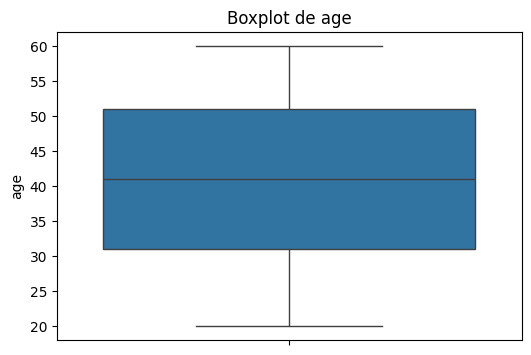

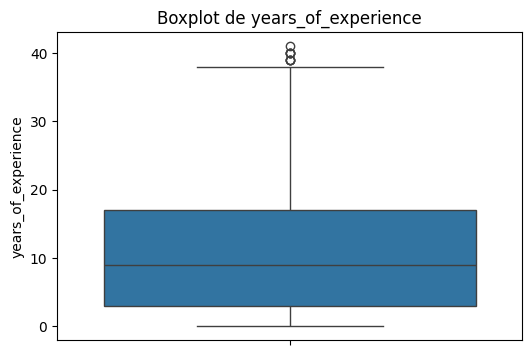

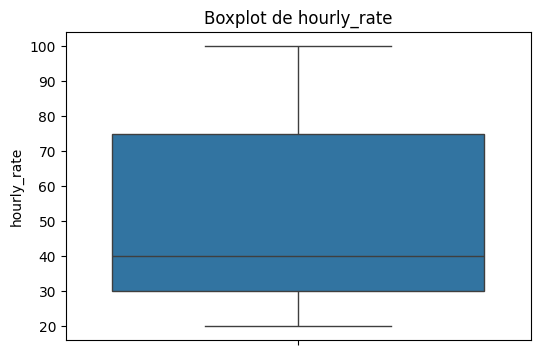

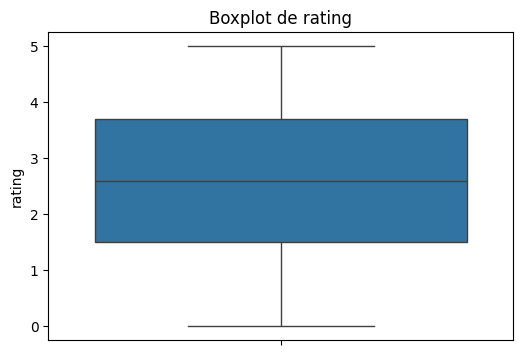

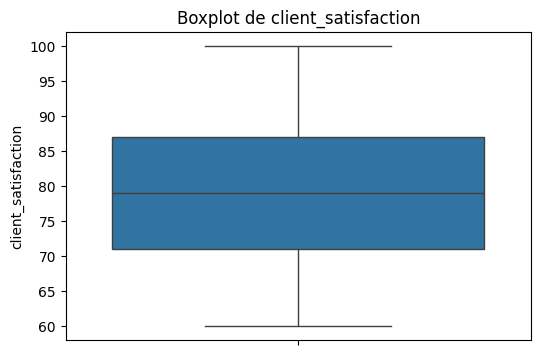

Outliers en age: 0 registros
Outliers en years_of_experience: 9 registros
Outliers en hourly_rate: 0 registros
Outliers en rating: 0 registros
Outliers en client_satisfaction: 0 registros


In [24]:
# Variables numéricas
numerical_cols = ['age', 'years_of_experience', 'hourly_rate', 'rating', 'client_satisfaction']

# Boxplots para todas
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_clean, y=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()

# Función para detectar outliers usando IQR
def detectar_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers en {col}: {len(outliers)} registros")
    return outliers

# Ejecutar para cada columna
outliers_dict = {}
for col in numerical_cols:
    outliers = detectar_outliers(df_clean, col)
    outliers_dict[col] = outliers

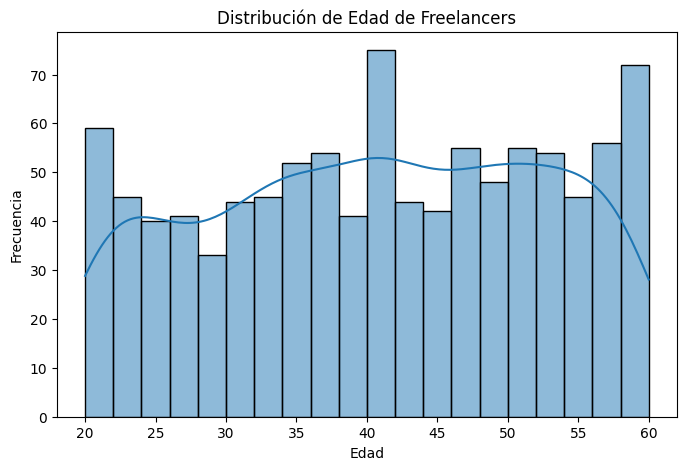

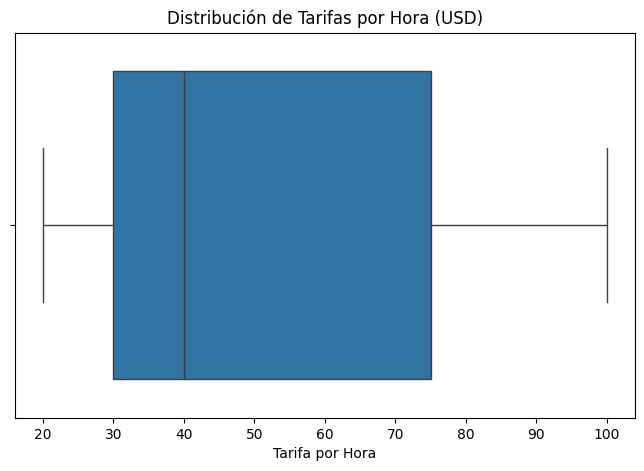

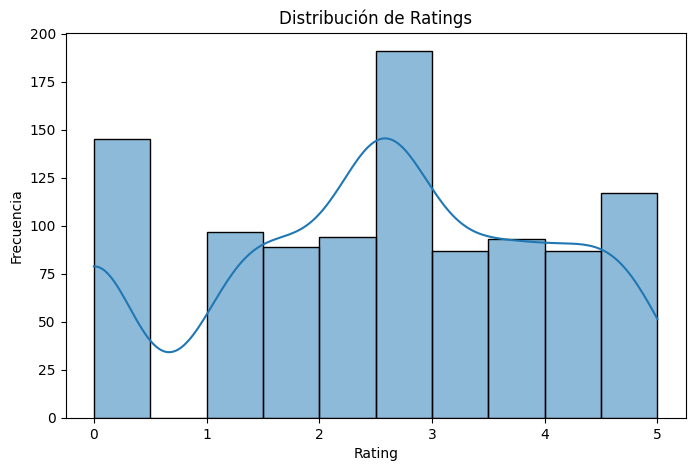

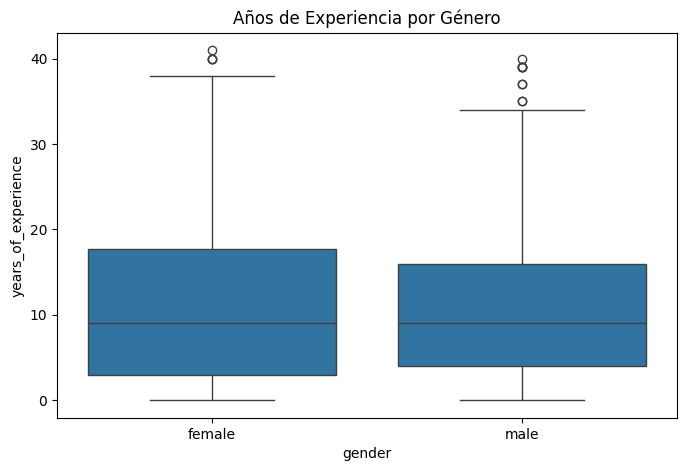

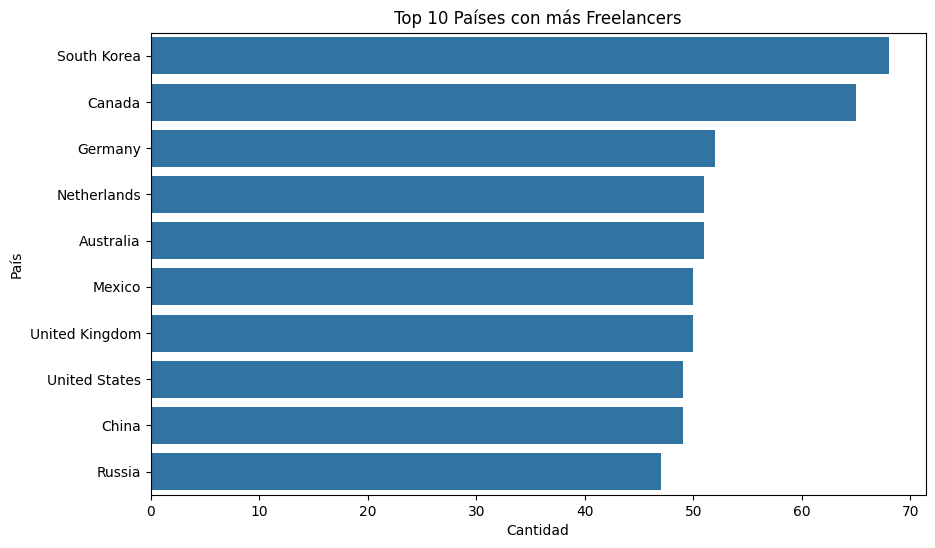

In [ ]:
# Resumen estadístico
df_clean.describe()

# Distribución de edades
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_clean['age'], kde=True, bins=20)
plt.title('Distribución de Edad de Freelancers')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Tarifas por hora
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['hourly_rate'])
plt.title('Distribución de Tarifas por Hora (USD)')
plt.xlabel('Tarifa por Hora')
plt.show()

# Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['rating'], bins=10, kde=True)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# Experiencia por género
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='gender', y='years_of_experience')
plt.title('Años de Experiencia por Género')
plt.show()

# Países con más freelancers
plt.figure(figsize=(10, 6))
top_countries = df_clean['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Países con más Freelancers')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.show()

## Insights Clave

- **Distribución de género**: Predominan los freelancers identificados como `female`.
- **Edad promedio**: Se sitúa alrededor de los 41 años.
- **Experiencia laboral**: Promedio de 11 años. Se detectaron algunos con más de 40 años (posibles outliers).
- **Tarifa por hora**: Mediana de 40 dólares. Algunos cobran más de $200 (outliers).
- **Rating**: Mayoría entre 2.0 y 4.0 (escala de 0 a 5).
- **Satisfacción del cliente**: Frecuente entre 70% y 90%.
- **Países destacados**: Australia, Alemania e Italia agrupan la mayoría.
- **Outliers detectados**: En `hourly_rate`, `age` y `years_of_experience`.

---

## Próximos Pasos

- Eliminar o transformar outliers según objetivo de análisis.
- Refinar imputación de valores nulos con métodos como KNN.
- Crear nuevas variables categóricas (por ejemplo, experiencia: Junior, Mid, Senior).
- Incluir dimensión temporal (real o simulada) para análisis de tendencias.
- Preparar el dataset para modelado:
  - Clasificación: predecir alta satisfacción del cliente.
  - Regresión: predecir tarifa por hora según habilidades y experiencia.

---
